## Mounting disk

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Importing modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Importing dataset and getting basic information about it

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/ipd/dataset/Dynamically Generated Hate Dataset v0.2.3.csv')
df1.drop(columns=['Unnamed: 0','acl.id','X1','type','target','level','split','annotator','round','acl.id.matched','round.base'],inplace=True)
df1.head()

,text,label
0,dalits are lowlives,hate
1,gay people are a burden to our society,hate
2,Arabs are not welcome,hate
3,I'm not saying we should actually eliminate he...,hate
4,bananas are for black people,hate


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/ipd/dataset/labeled_data.csv')
df2 = df2.drop(columns=['Unnamed: 0','count','offensive_language','neither','class']).rename(columns={'hate_speech':'hate_score','tweet':'text'})
df2.head()

,hate_score,text
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
hate_score = []
for label in df1.label:
  hate_score.append(int(label=='hate'))
df1['hate_score'] = hate_score

In [ ]:
df1.dtypes

text          object
label         object
hate_score     int64
dtype: object

In [ ]:
df1.drop(columns=['label'],inplace=True)

In [ ]:
df1.dtypes

text          object
hate_score     int64
dtype: object

In [ ]:
df2.dtypes

hate_score     int64
text          object
dtype: object

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.8 MB/s eta 0:00:00


In [ ]:
import datasets
dataset = datasets.load_dataset('ucberkeley-dlab/measuring-hate-speech', 'default')
df3 = dataset['train'].to_pandas()
df3.describe()

Generating train split: 0 examples [00:00, ? examples/s]

,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,hatespeech,hate_speech_score,infitms,outfitms,annotator_severity,std_err,annotator_infitms,annotator_outfitms,hypothesis,annotator_age
count,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.00000,135556.000000,135556.000000,135556.000000,135556.000000,...,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135451.000000
mean,23530.416138,5567.097812,1.281352,2.954307,2.828875,2.56331,2.278638,2.698575,1.846211,1.052045,...,0.744733,-0.567428,1.034322,1.001052,-0.018817,0.300588,1.007158,1.011841,0.014589,37.910772
std,12387.194125,3230.508937,1.023542,1.231552,1.309548,1.38983,1.370876,0.898500,1.402372,1.345706,...,0.932260,2.380003,0.496867,0.791943,0.487261,0.236380,0.269876,0.675863,0.613006,11.641276
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-8.340000,0.100000,0.070000,-1.820000,0.020000,0.390000,0.280000,-1.578693,18.000000
25%,18148.000000,2719.000000,0.000000,2.000000,2.000000,2.00000,1.000000,2.000000,1.000000,0.000000,...,0.000000,-2.330000,0.710000,0.560000,-0.380000,0.030000,0.810000,0.670000,-0.341008,29.000000
50%,20052.000000,5602.500000,1.000000,3.000000,3.000000,3.00000,3.000000,3.000000,2.000000,0.000000,...,0.000000,-0.340000,0.960000,0.830000,-0.020000,0.340000,0.970000,0.850000,0.110405,35.000000
75%,32038.250000,8363.000000,2.000000,4.000000,4.000000,4.00000,3.000000,3.000000,3.000000,2.000000,...,2.000000,1.410000,1.300000,1.220000,0.350000,0.420000,1.170000,1.130000,0.449555,45.000000
max,50070.000000,11142.000000,3.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,...,2.000000,6.300000,5.900000,9.000000,1.360000,1.900000,2.010000,9.000000,0.987511,81.000000


In [ ]:
print(df3.shape)
df3.columns

(135556, 131)


Index(['comment_id', 'annotator_id', 'platform', 'sentiment', 'respect',
       'insult', 'humiliate', 'status', 'dehumanize', 'violence',
       ...
       'annotator_religion_hindu', 'annotator_religion_jewish',
       'annotator_religion_mormon', 'annotator_religion_muslim',
       'annotator_religion_nothing', 'annotator_religion_other',
       'annotator_sexuality_bisexual', 'annotator_sexuality_gay',
       'annotator_sexuality_straight', 'annotator_sexuality_other'],
      dtype='object', length=131)

In [ ]:
req = ["hate_speech_score" , "text"]
not_req = [column for column in df3.columns if column not in req]
df3.drop(columns = not_req , inplace = True)

In [ ]:
hate = (df3['hate_speech_score'] > 0.5).sum()
not_hate = (df3['hate_speech_score'] < -1).sum()
neutral = len(df3) - hate - not_hate

df3 = df3[~((df3['hate_speech_score'] >= -1) & (df3['hate_speech_score'] <= 0.5))]

hate = (df3['hate_speech_score'] > 0.5).sum()
not_hate = (df3['hate_speech_score'] < -1).sum()
neutral = len(df3) - hate - not_hate

df3['hate_speech_score'] = df3['hate_speech_score'].apply(lambda x: 0.0 if x < -1.0 else 1.0)

In [ ]:
df3 = df3.reset_index().drop(columns='index').rename(columns={'hate_speech_score':'hate_score'})

In [ ]:
df3.head()

,hate_score,text
0,0.0,Yes indeed. She sort of reminds me of the elde...
1,0.0,The trans women reading this tweet right now i...
2,1.0,For starters bend over the one in pink and kic...
3,0.0,Sounds like the kinda wholsesome life I'd die ...
4,1.0,Fuck off you insufferable retarded faggot.


In [ ]:
df = pd.concat([df1,df2,df3],ignore_index=True)
df.head()

,text,hate_score
0,dalits are lowlives,1.0
1,gay people are a burden to our society,1.0
2,Arabs are not welcome,1.0
3,I'm not saying we should actually eliminate he...,1.0
4,bananas are for black people,1.0


In [ ]:
for i in range(len(df)):
  if df['hate_score'][i]>0:
    df['hate_score'][i]=1

In [ ]:
df.shape

(168626, 2)

In [ ]:
df.describe()

,hate_score
count,168626.000000
mean,0.451982
std,0.497690
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
df.hate_score.value_counts()

hate_score
0.0    92410
1.0    76216
Name: count, dtype: int64

In [ ]:
df.head()

,text,hate_score
0,dalits are lowlives,1.0
1,gay people are a burden to our society,1.0
2,Arabs are not welcome,1.0
3,I'm not saying we should actually eliminate he...,1.0
4,bananas are for black people,1.0


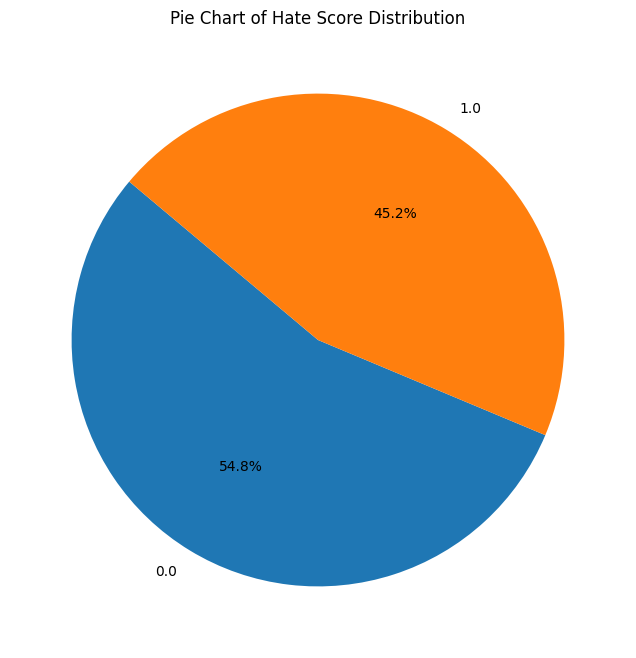

In [ ]:
value_counts = df['hate_score'].value_counts(normalize=True) * 100

filtered_values = value_counts[value_counts > 5]

plt.figure(figsize=(8, 8))
plt.pie(filtered_values, labels=filtered_values.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Hate Score Distribution')
plt.show()

## Text Preprocessing

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words and word not in string.punctuation]

    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens]

    preprocessed_text = ' '.join(tokens)

    return preprocessed_text



In [ ]:
df['preprocessed_text'] = df['text'].apply(preprocess_text)

In [ ]:
words = []
for sentence in df['preprocessed_text']:
  words.extend(sentence.split())

In [ ]:
max_words = len(set(words))+1
max_words

75740

In [ ]:
from transformers import BertTokenizer

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['preprocessed_text'])

In [ ]:
X = tokenizer.texts_to_sequences(df['preprocessed_text'])

In [ ]:
max_len = 0
for sent in X:
  if max_len < len(sent):
    max_len = len(sent)
max_len

229

In [ ]:
max_len = max_len+1
X = pad_sequences(X, maxlen=max_len)

In [ ]:
X.shape

(168626, 230)

In [ ]:
from keras.utils import to_categorical
y = to_categorical(df['hate_score'])

In [ ]:
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

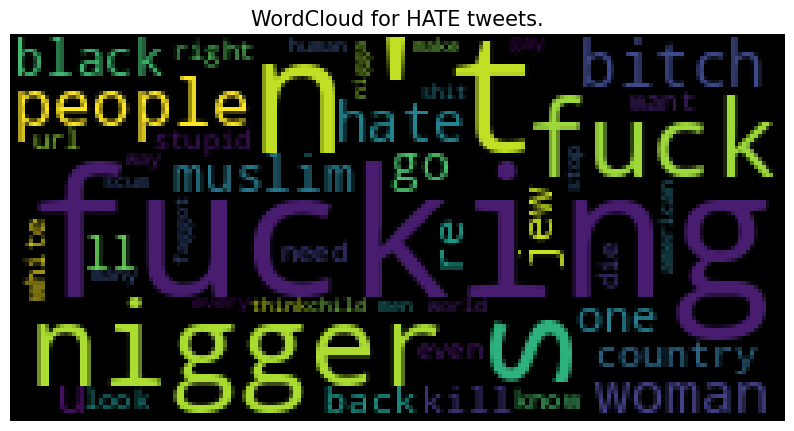

In [ ]:
def plot_word_cloud(data, typ):
  tweet_corpus = " ".join(data['preprocessed_text'])

  plt.figure(figsize = (10,10))

  wc = WordCloud(max_words = 100,
                width = 200,
                height = 100,
                collocations = False).generate(tweet_corpus)

  plt.title(f'WordCloud for {typ} tweets.', fontsize = 15)
  plt.axis('off')
  plt.imshow(wc)
  plt.show()
  print()

plot_word_cloud(df[df['hate_score']>=0.75], typ='HATE')

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((118038, 230), (50588, 230), (118038, 2), (50588, 2))

## Model Development

In [ ]:
from keras.callbacks import EarlyStopping
from keras.regularizers import l1

model = keras.models.Sequential([
    layers.Embedding(max_words, 1024 , input_length=max_len),
    # layers.Bidirectional(layers.LSTM(64)),
    layers.LSTM(512),
    layers.Dense(128, activation='relu', kernel_regularizer=l1(0.01)),
    layers.Dense(16, activation='relu', kernel_regularizer=l1(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(2, activation='softmax')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 230, 1024)         77557760  
                                                                 
 lstm (LSTM)                 (None, 512)               3147776   
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 16)                2064      
                                                                 
 batch_normalization (Batch  (None, 16)                64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                        

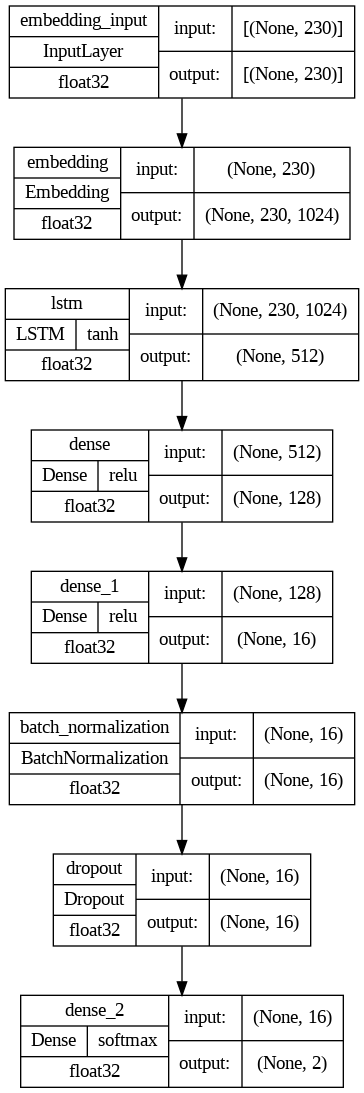

In [ ]:
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=5,
                    verbose=1,
                    batch_size=64)

Epoch 1/5
   3/1845 [..............................] - ETA: 7:01:31 - loss: 9.0310 - accuracy: 0.7135

KeyboardInterrupt: 

In [ ]:
y_train

In [ ]:
def isHate(text):
  x_text = tokenizer.texts_to_sequences([text])
  x_text = pad_sequences(x_text, maxlen=max_len)
  # print(x_text)
  y_text = model.predict(x_text)
  if y_text[0][0]>0.75:
    return "Not Hate"
  return "Hate"

In [ ]:
isHate('')

In [ ]:
p =

In [ ]:
import joblib
joblib.dump(model,'/content/drive/MyDrive/ipd/model/canDeployModel.joblib')
joblib.dump(tokenizer,'/content/drive/MyDrive/ipd/model/canDeployTokenizer.joblib')

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
for pred in y_pred:
  if pred[0]>0.75:
    pred[0] = 1
    pred[1] = 0
  else:
    pred[0] = 1
    pred[1] = 0

In [ ]:
def calculate_accuracy(y_pred, y_val):
    # Ensure both y_pred and y_val have the same length
    if len(y_pred) != len(y_val):
        raise ValueError("y_pred and y_val must have the same length.")

    # Count the number of correct predictions
    num_correct = sum(1 for pred, true in zip(y_pred, y_val) if pred[0] == true[0] and pred[1] == true[1])

    # Calculate accuracy as the proportion of correct predictions
    accuracy = num_correct / len(y_val)

    return accuracy
calculate_accuracy(y_pred,y_val)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy :",accuracy_score(y_val,y_pred))
cr = classification_report(y_val,y_pred)
print("classification report :\n",cr)

## Multinomial Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
def to_1d(lt):
  new_lt = []
  for i in lt:
    new_lt.append(i[0])
  return np.array(new_lt)

In [ ]:
new_y_train = to_1d(y_train)
new_y_val = to_1d(y_val)

In [ ]:
#Fit training data on Multinomial Naive Bayes
nb = MultinomialNB()
nb.fit(X_train,new_y_train)

In [ ]:
#Print the accuracy and create a classification report
y_pred = nb.predict(X_val)
print("For (CountVectorizer+Naive Bayes) : ")
print("Accuracy :",accuracy_score(new_y_val,y_pred))
cr = classification_report(new_y_val,y_pred)
print("classification report :\n",cr)